# Question 1

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

In [110]:
df = pd.read_csv('marketing_data.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [112]:
df.sample(5)

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1763   8916        1975  Graduation       Divorced  $36,627.00         2   
1419   6544        1949         PhD       Together  $67,911.00         0   
1780   2461        1955      Master         Single  $51,124.00         1   
1340  10446        1957         PhD        Married  $82,017.00         0   
1740   6932        1941         PhD        Married  $93,027.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
1763         0     7/23/13       78         9  ...                  3   
1419         1     5/22/14       63       529  ...                 11   
1780         1    12/18/13       79        26  ...                  3   
1340         0     11/7/12       58       184  ...                  7   
1740         0     4/13/13       77      1285  ...                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1763                  5             0             0             0   
1419                  3             0             0             0   
1780                  3             0             0             0   
1340                  2             0             1             1   
1740                  2             0             0             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
1763             0             0         0         0       SA  
1419             0             0         0         0      GER  
1780             0             0         0         0       CA  
1340             1             0         1         0       CA  
1740             0             0         0         0       SP  

[5 rows x 28 columns]

- The data set has 28 columns and 2240 rows

 - Income column needs to be changed from object to number

- 28 columns are non-null

 - 5 columns are object

- 23 columns are integer type

# Question 2 

In [113]:
df.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [114]:
df.describe(include='O')

Education Marital_Status     Income  Dt_Customer Country
count         2240           2240        2216        2240    2240
unique           5              8        1974         663       8
top     Graduation        Married  $7,500.00      8/31/12      SP
freq          1127            864          12          12    1095

# Basic observations
- Middle 50% data band is large for MntWines but is then is becomes smallest for MntSweetProducts and MntFruits
- Top Country is SP. There are 8 unique countries
- Most of the people are Graduate
- Most of the people are Married 

# Question 3

In [115]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64

- There are missing values in Income column

In [116]:
df_income = pd.DataFrame({'value' : df[' Income '], 'Missing?' : df[' Income '].isnull()}) 
df_income[df_income['Missing?']==True]

value  Missing?
134    NaN      True
262    NaN      True
394    NaN      True
449    NaN      True
525    NaN      True
590    NaN      True
899    NaN      True
997    NaN      True
1096   NaN      True
1185   NaN      True
1213   NaN      True
1312   NaN      True
1515   NaN      True
1558   NaN      True
1693   NaN      True
1804   NaN      True
1858   NaN      True
1863   NaN      True
1880   NaN      True
1967   NaN      True
1983   NaN      True
2139   NaN      True
2165   NaN      True
2170   NaN      True

In [117]:
df = df.fillna(df.median())
df.isna().sum()

C:\Users\REIBHU~1.SAN\AppData\Local\Temp/ipykernel_908/2162131100.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

# Question 4

In [118]:
df[' Income '] = df[' Income '].str.replace(',', '')
df[' Income '] = df[' Income '].str.replace('$', '')

C:\Users\REIBHU~1.SAN\AppData\Local\Temp/ipykernel_908/1595192243.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[' Income '] = df[' Income '].str.replace('$', '')


In [119]:
df.head()

ID  Year_Birth   Education Marital_Status    Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.00         0         0   
1      1        1961  Graduation         Single  57091.00         0         0   
2  10476        1958  Graduation        Married  67267.00         0         1   
3   1386        1967  Graduation       Together  32474.00         1         1   
4   5371        1989  Graduation         Single  21474.00         1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0     6/16/14        0       189  ...                  6                  1   
1     6/15/14        0       464  ...                  7                  5   
2     5/13/14        0       134  ...                  5                  2   
3     5/11/14        0        10  ...                  2                  7   
4      4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 28 columns]

In [120]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [121]:
df.head()

ID  Year_Birth   Education Marital_Status    Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.00         0         0   
1      1        1961  Graduation         Single  57091.00         0         0   
2  10476        1958  Graduation        Married  67267.00         0         1   
3   1386        1967  Graduation       Together  32474.00         1         1   
4   5371        1989  Graduation         Single  21474.00         1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 28 columns]

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [123]:
df[' Income '] = pd.to_numeric(df[' Income '])

In [124]:
df['Education'] = pd.Series(df['Education'], dtype="string")
df['Marital_Status'] = pd.Series(df['Marital_Status'], dtype="string")
df['Country'] = pd.Series(df['Country'], dtype="string")

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   string        
 3   Marital_Status       2240 non-null   string        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Question 5

In [126]:
df['Age']=2022-df['Year_Birth']

In [127]:
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   string        
 3   Marital_Status       2240 non-null   string        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Question 6

In [129]:
df.head()

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2014-06-16        0       189  ...                  1             0   
1  2014-06-15        0       464  ...                  5             0   
2  2014-05-13        0       134  ...                  2             0   
3  2014-05-11        0        10  ...                  7             0   
4  2014-04-08        0         6  ...                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

   Country  Age  
0       SP   52  
1       CA   61  
2       US   64  
3      AUS   55  
4       SP   33  

[5 rows x 29 columns]

In [130]:
df['Total_amount']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [132]:
df['Total_amount'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_amount, dtype: float64

In [133]:
df.head()

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  \
0             0             0             0         1         0       SP   52   
1             0             0             1         1         0       CA   61   
2             0             0             0         0         0       US   64   
3             0             0             0         0         0      AUS   55   
4             0             0             0         1         0       SP   33   

   Total_amount  
0          1190  
1           577  
2           251  
3            11  
4            91  

[5 rows x 30 columns]

In [134]:
(df['MntWines'].sum()/df['Total_amount'].sum())*100

50.17111426187999

In [135]:
(df['MntFruits'].sum()/df['Total_amount'].sum())*100

4.341748047882517

In [136]:
(df['MntMeatProducts'].sum()/df['Total_amount'].sum())*100

27.558681432702425

In [137]:
(df['MntFishProducts'].sum()/df['Total_amount'].sum())*100

6.19438049562708

In [138]:
(df['MntSweetProducts'].sum()/df['Total_amount'].sum())*100

4.467320271070931

In [139]:
(df['MntGoldProds'].sum()/df['Total_amount'].sum())*100

7.26675549083706

# Question 7

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   string        
 3   Marital_Status       2240 non-null   string        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [142]:
df['Total_purchase']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']

In [143]:
df['Total_purchase'].describe()

count    2240.000000
mean       20.178571
std         7.293275
min         0.000000
25%        14.000000
50%        19.000000
75%        25.000000
max        46.000000
Name: Total_purchase, dtype: float64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   string        
 3   Marital_Status       2240 non-null   string        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [145]:
(df['NumDealsPurchases'].sum()/df['Total_purchase'].sum())*100

11.52212389380531

In [146]:
(df['NumWebPurchases'].sum()/df['Total_purchase'].sum())*100

20.24336283185841

In [147]:
(df['NumCatalogPurchases'].sum()/df['Total_purchase'].sum())*100

13.192477876106196

In [148]:
(df['NumStorePurchases'].sum()/df['Total_purchase'].sum())*100

28.694690265486727

In [149]:
(df['NumWebVisitsMonth'].sum()/df['Total_purchase'].sum())*100

26.34734513274336

# Question 8

In [150]:
series=[df["AcceptedCmp1"].sum(),df["AcceptedCmp2"].sum(),df["AcceptedCmp3"].sum(),df["AcceptedCmp4"].sum(),df["AcceptedCmp5"].sum()]
series_name=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]

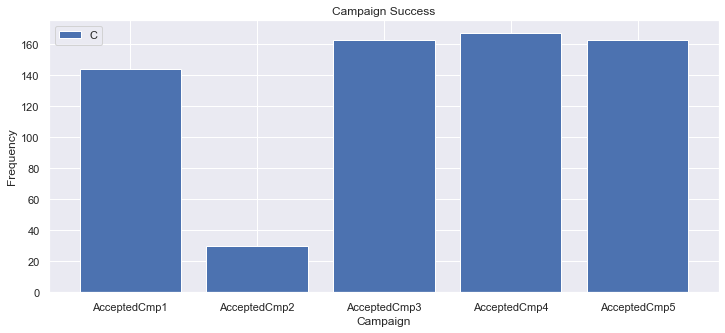

In [151]:
plt.figure(figsize=(12, 5))
plt.bar(series_name,series)  # shows each person's age interms of bar
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.title('Campaign Success')
plt.legend("Campaign")
plt.show()

- Campaign 4 is most successful

# Question 9

In [152]:
series1=[df["MntWines"].sum(),df["MntFruits"].sum(),df["MntMeatProducts"].sum(),df["MntFishProducts"].sum(),df["MntSweetProducts"].sum(),df["MntGoldProds"].sum()]
series_name1=["Wines","Fruits","Meat","Fish","Sweet","Gold"]

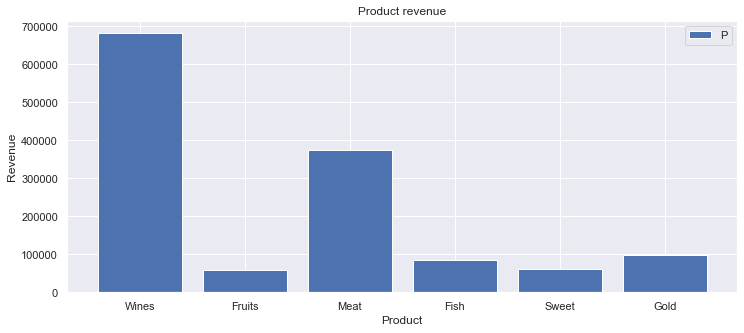

In [153]:
plt.figure(figsize=(12, 5))
plt.bar(series_name1,series1)  # shows each person's age interms of bar
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title('Product revenue')
plt.legend("Products")
plt.show()

- The best selling product is Wines
- The worst selling product is Fruits

# Question 10

In [165]:
label_x=str(df["Age"])

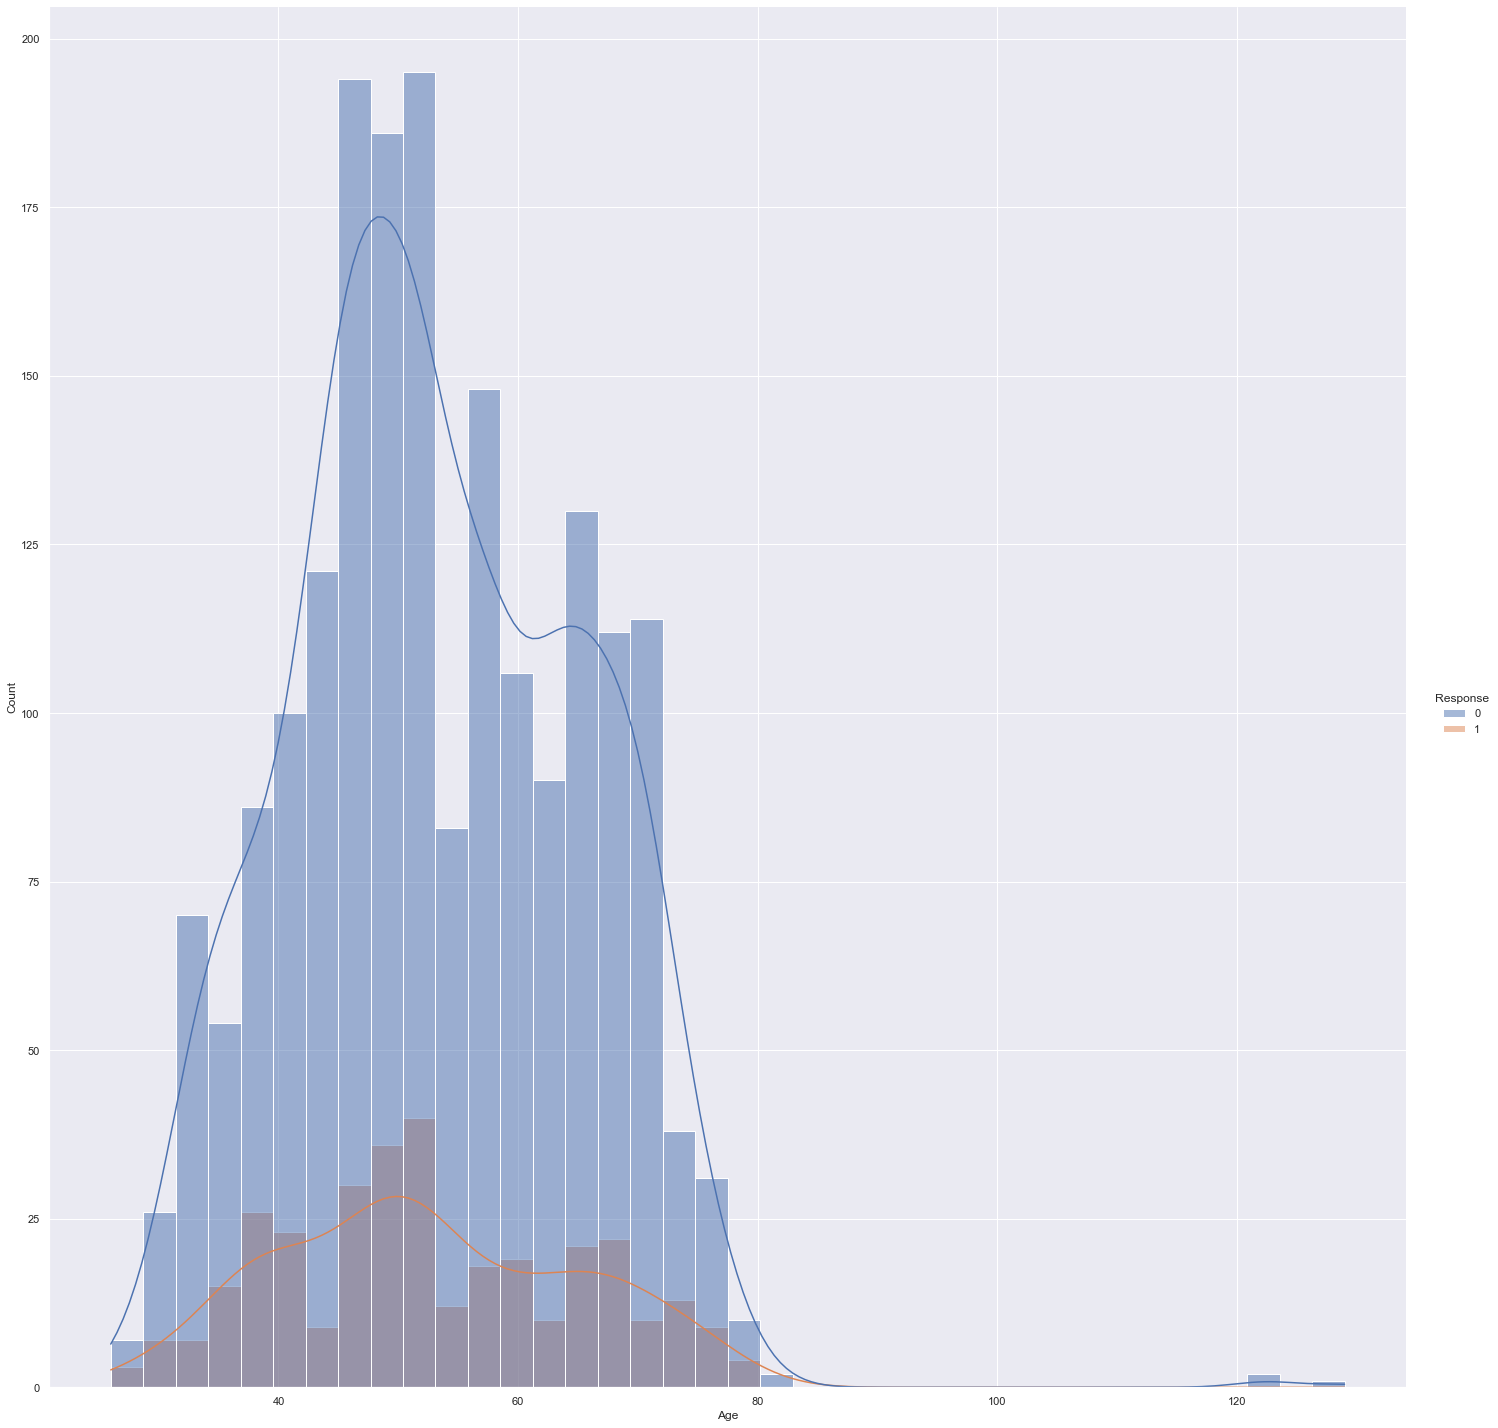

In [176]:
ax=sns.displot(data=df, x="Age", height=20, aspect=1, hue="Response", kde=True) 
plt.show()

 - Last campaign was successful for people between age group 45-55

# Question 11

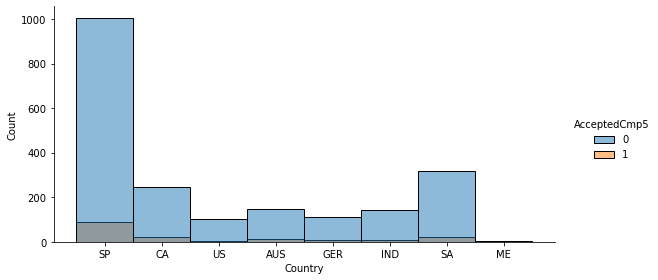

In [41]:
sns.displot(data=df, x="Country", height=4, aspect=2, hue="AcceptedCmp5") 
plt.show()

- The Last Campaign was successful for Country SP

# Question 12

In [42]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Total_amount', 'Total_purchase'],
      dtype='object')

In [43]:
df["Dependents"]=df["Kidhome"]+df["Teenhome"]

<AxesSubplot:xlabel='Dependents', ylabel='Total_amount'>

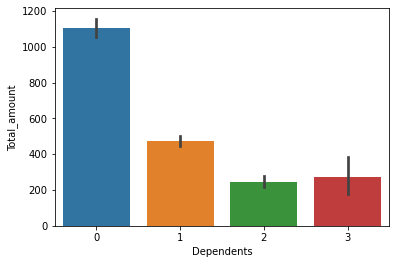

In [44]:
sns.barplot(x="Dependents", y="Total_amount", data=df)

<AxesSubplot:xlabel='Dependents', ylabel='Total_purchase'>

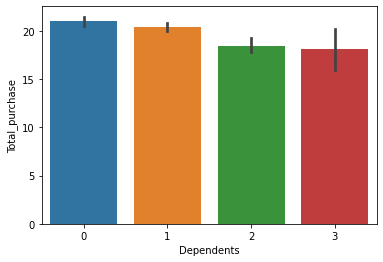

In [45]:
sns.barplot(x="Dependents", y="Total_purchase", data=df)

- Families with Zero Dependent have the highest amount
- Failies with Two Dependent have the lowest amount

- Families with Zero Dependent have the highest purchases
- Failies with Three Dependent have the lowest purchases

# Question 13

In [46]:
df2=df.corr()

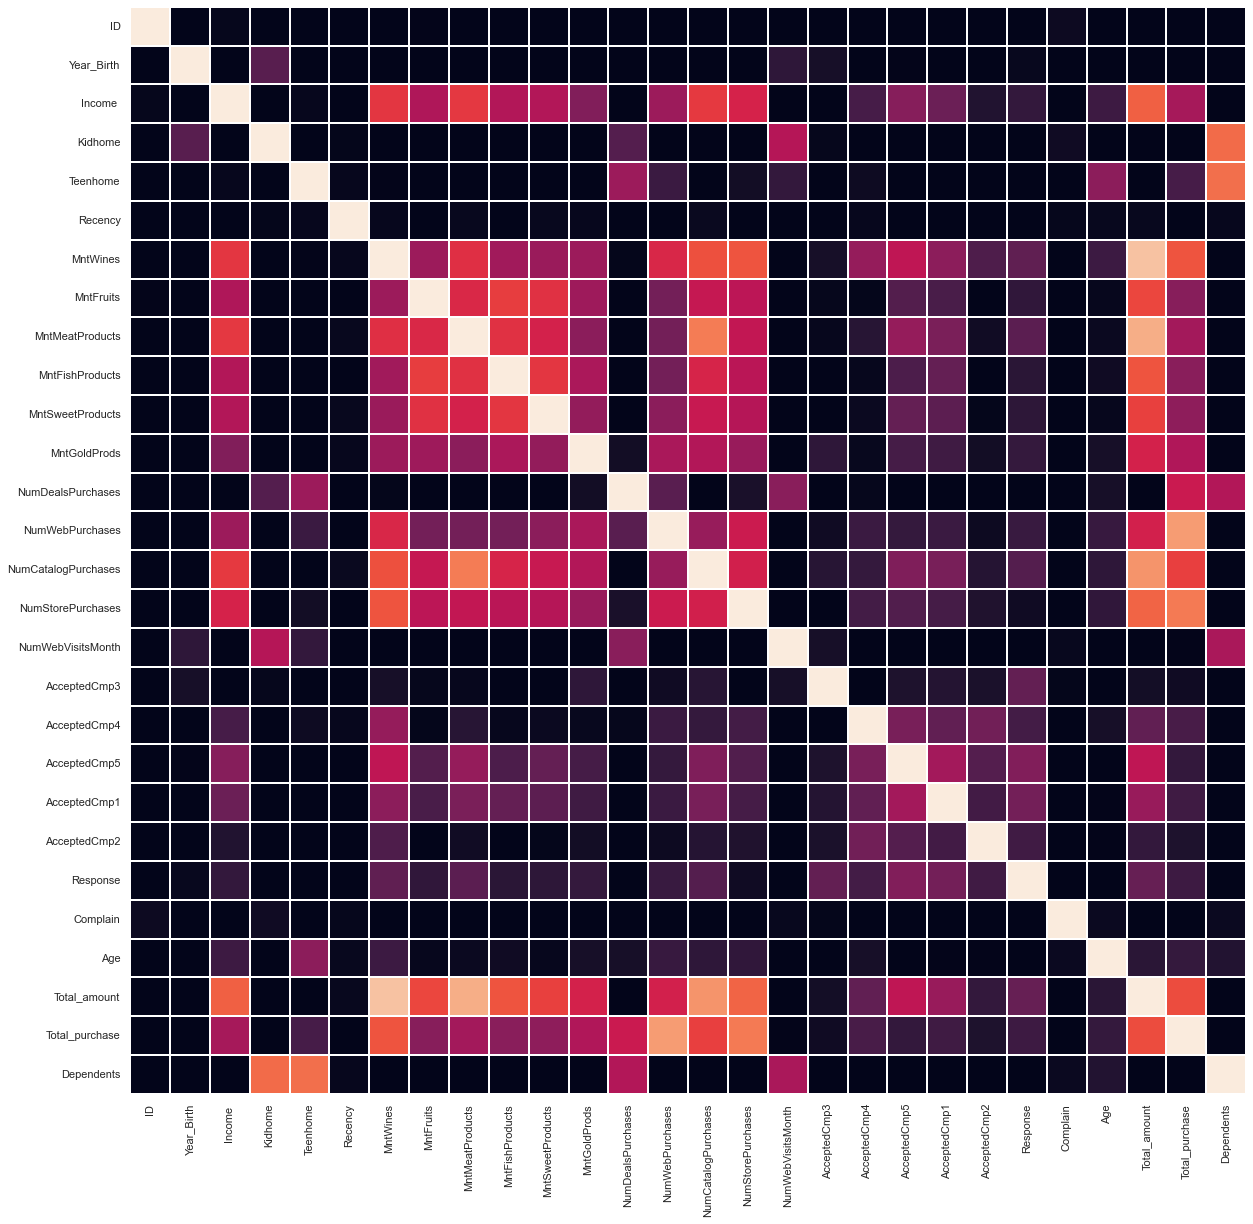

In [47]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(20,20)) 
ax_grid = sns.heatmap(df2, cbar=0, linewidths=2,vmax=1, vmin=0, ax=ax)
plt.show()

# Question 14

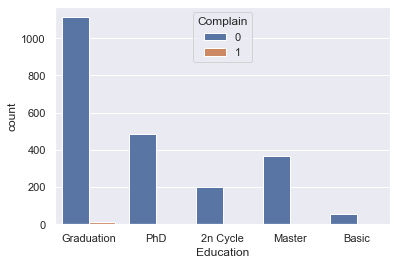

In [94]:
sns.countplot(data=df, x="Education",hue="Complain") 
plt.show()

- On directly calling  making the graph we can see that the the number of people complaininfg is a very small prportion to the not complaining people
-Hence we will make a seperate graph that gives us the distrivution of people complaining 

In [85]:
df3=df.loc[df["Complain"]==1]

In [98]:
series2=df3["Education"].value_counts()
series2

Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: Education, dtype: Int64

In [99]:
series2_name=series2.index
series2_name

Index(['Graduation', '2n Cycle', 'Master', 'PhD'], dtype='object')

In [100]:
frame = { 'Education': series2_name, 'Complain_count': series2 }
df4=pd.DataFrame(frame)
df4

Education  Complain_count
Graduation  Graduation              14
2n Cycle      2n Cycle               4
Master          Master               2
PhD                PhD               1

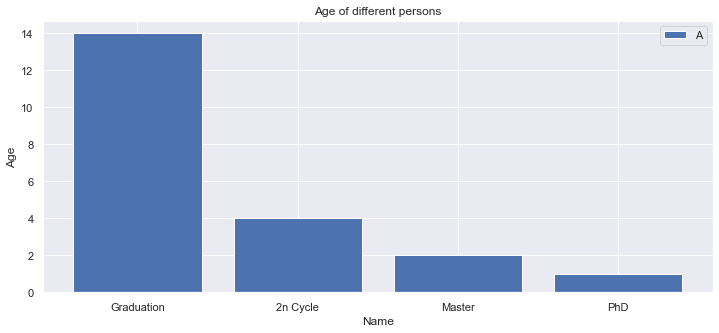

In [101]:
plt.figure(figsize=(12, 5))
plt.bar(series2_name, series2)  # shows each person's age interms of bar
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.title('Education of different persons')
plt.legend("Education")
plt.show()

 - We see the people whose Education Levl is Graduation make the Most Complaints where as people with Basic Education do not make any Complaint

# Question 15

In [172]:
series3=["Total_amount","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

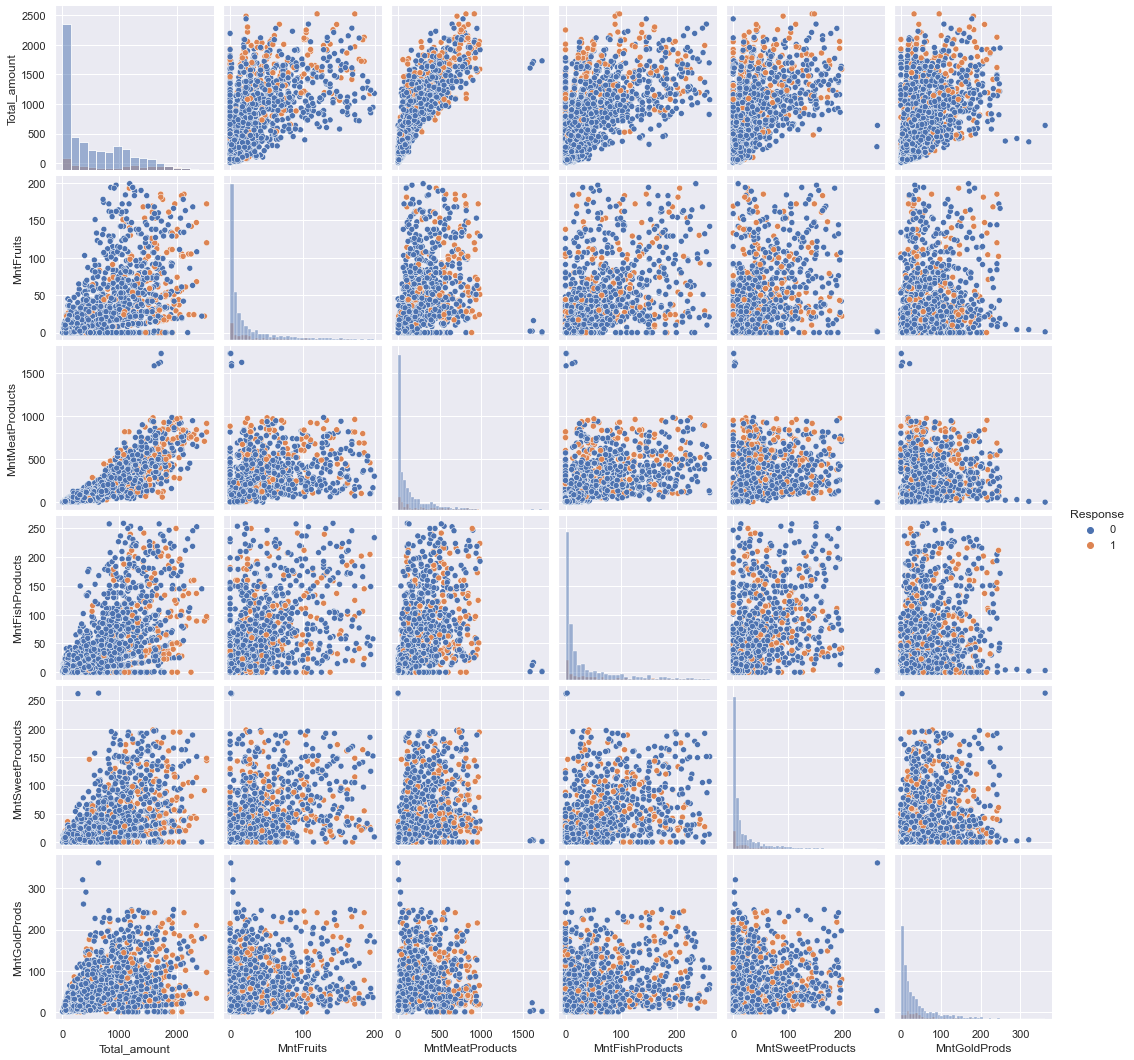

In [177]:
sns.pairplot(df,x_vars=series3,y_vars=series3,hue="Response",diag_kind="hist")

- We see that a majority of the Customers were already acquired before last campaign
- We also see that the purchases in which the amount is large is done by Customers acquired in last campaign

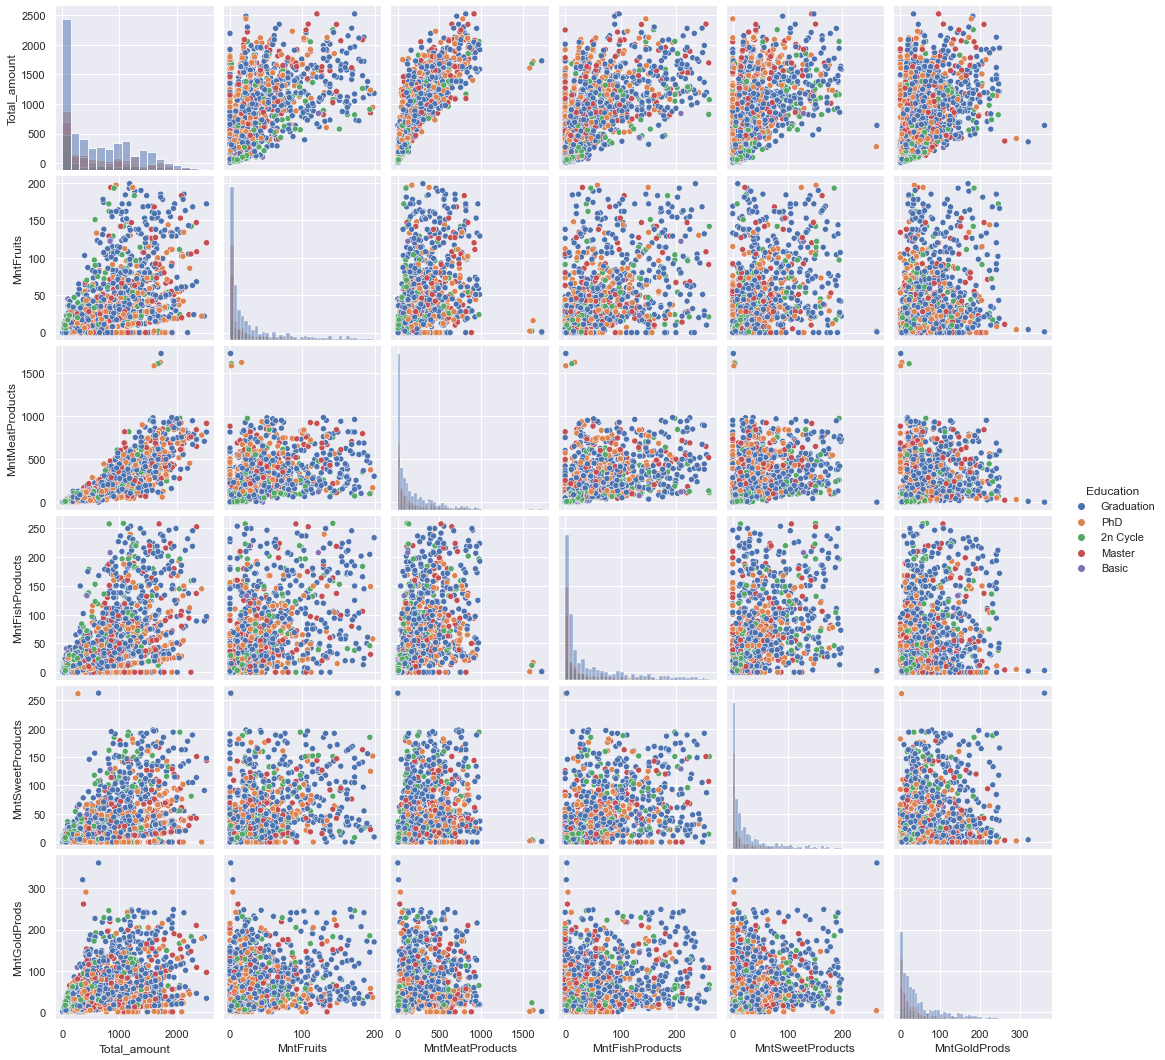

In [178]:
sns.pairplot(df,x_vars=series3,y_vars=series3,hue="Education",diag_kind="hist")

- The Education level that makes the second highest purchases is PhD
- The Education level that makes the second highest purchases is Master's
- The Education level Graduation makes the most amount of purchases

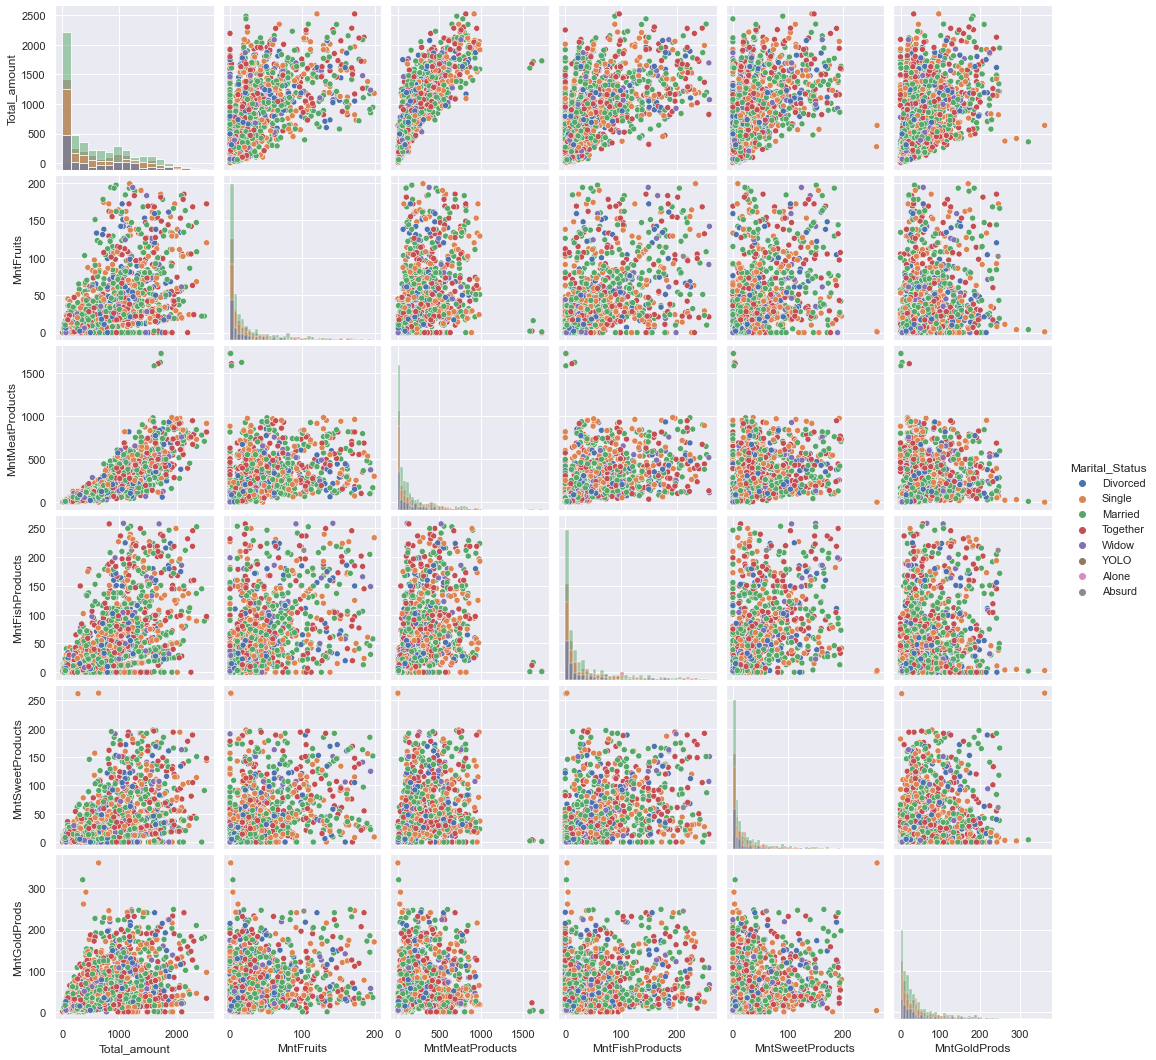

In [179]:
sns.pairplot(df,x_vars=series3,y_vars=series3,hue="Marital_Status",diag_kind="hist")

- The Majority of the Customers are Married
- The Second highest majority of Customers are Single